In [1]:
%pylab inline
import os
import seaborn as sns
import ipywidgets as widgets
sns.set_context('talk')
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


## Datensatz: Normalized Yale Face Dataset

Heruntergeladen von http://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/

* 165 Bilder von 15 Personen
* Verschiedene Beleuchtungswinkel
* Verschiedene Gesichtsausdrücke
* Bilder normalisiert:
  * Gesichter rotiert, sodass Augen auf einer Linie sind.
  * Gesichter ausgeschnitten, sodass der Bildmittelpunkt zwischen den Augen liegt.
  * 195x231 Pixel breit/hoch

In [2]:
images = [imread(os.path.join("YALE", "centered", f)) for f in os.listdir(os.path.join("YALE", "centered"))]
ids = array([f[:9] for f in os.listdir(os.path.join("YALE", "centered"))])

In [3]:
imgshape = images[0].shape

## 10 zufällige Gesichter

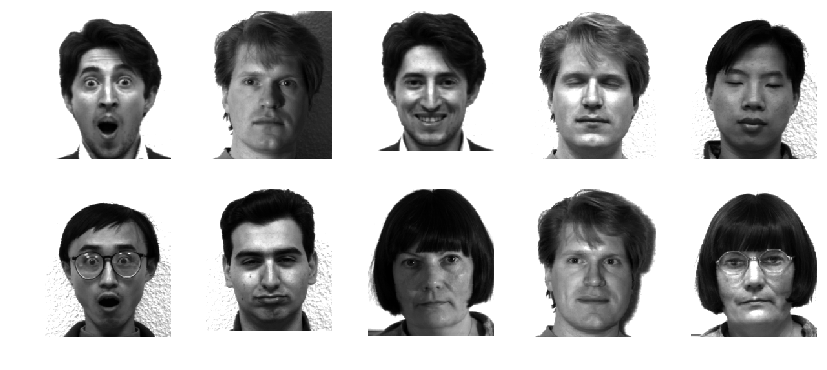

In [4]:
figure(figsize=(14,6))
gray()
for i,k in enumerate(random.choice(arange(len(images)), 10)):
    subplot(2,5,i+1)
    imshow(images[k])
    axis("off")

## Eigenfaces

50 Komponenten

In [5]:
# Bilder als Vektoren abrollen
X = array(images).reshape(len(images), -1)

In [6]:
pca = PCA(n_components=50).fit(X)

### Mittleres Gesicht

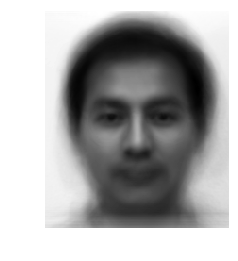

In [7]:
gray()
imshow(pca.mean_.reshape(imgshape))
axis('off');

### 20 erste Hauptrichtungen

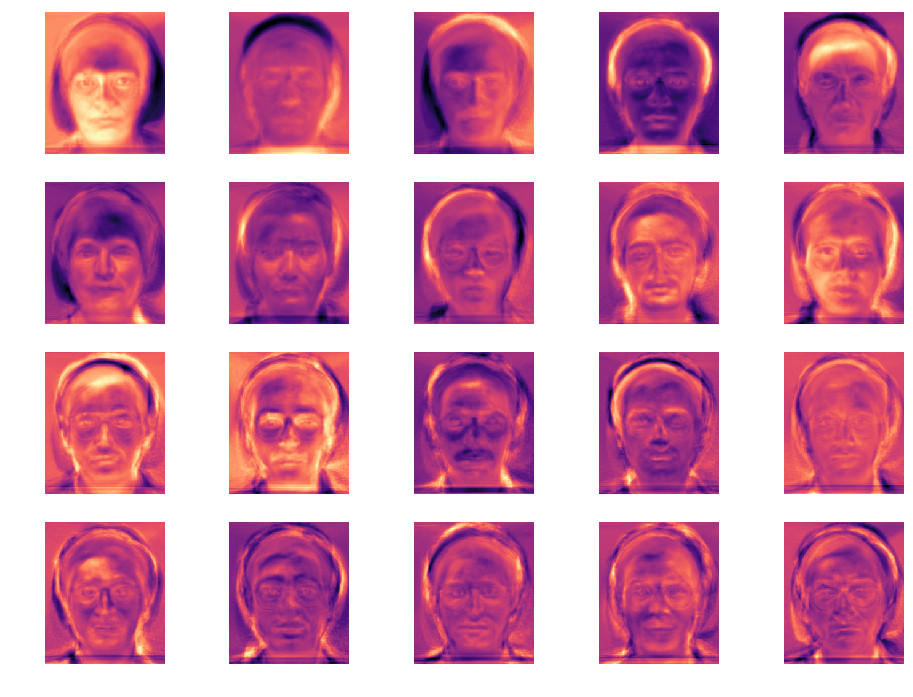

In [8]:
figure(figsize=(16,12))
for i,img in enumerate(pca.components_[:20]):
    subplot(4,5,i+1)
    imshow(img.reshape(imgshape))
    magma()
    axis('off')

### Sichtung

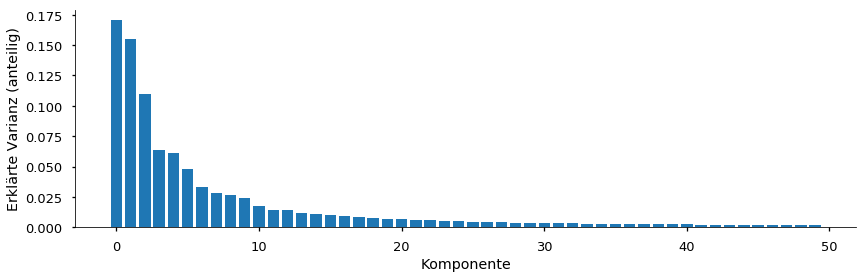

In [9]:
figure(figsize=(14,4))
bar(arange(pca.n_components_), pca.explained_variance_ratio_)
sns.despine()
xlabel("Komponente")
ylabel("Erklärte Varianz (anteilig)");

In [10]:
pX = pca.transform(X)

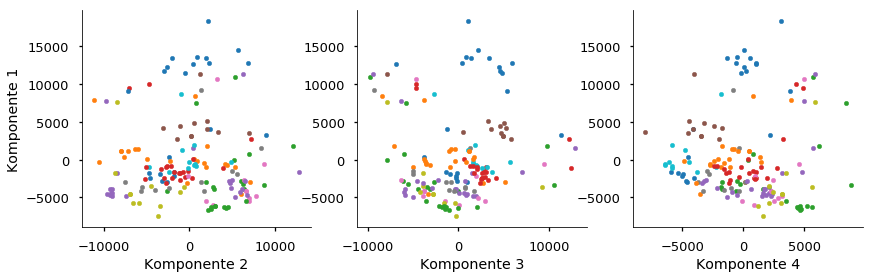

In [11]:
figure(figsize=(14,4))
for c2 in range(1,4):
    subplot(1,3,c2)
    for id in unique(ids):
        scatter(pX[ids==id,c2], pX[ids==id,0], s=20, label=id)
    sns.despine()
    if c2==1:
        ylabel("Komponente 1")
    xlabel("Komponente {}".format(c2+1));

In [12]:
@widgets.interact(k=(0,len(images)))
def faceDetails(k=0):
    figure(figsize=(16,4))
    gray()
    subplot(131)
    title("Original")
    imshow(images[k])
    axis('off')

    subplot(132)
    bar(arange(pca.n_components_), pX[k])
    axhline(0, color='black', lw=1)
    title("Merkmalsvektor")
    sns.despine()
    xlabel("Komponente")
    ylabel("Loading")

    subplot(133)
    imshow(pca.inverse_transform(pX[k]).reshape(imgshape))
    title("Rekonstruktion")
    axis('off')
    
    show()

### Synthese

In [13]:
rnge = (-10000,10000,1)
@widgets.interact(
    f01 = rnge, f02 = rnge, f03 = rnge, f04 = rnge, f05 = rnge,
    f06 = rnge, f07 = rnge, f08 = rnge, f09 = rnge, f10 = rnge)
def synth(f01=0, f02=0, f03=0, f04=0, f05=0, f06=0, f07=0, f08=0, f09=0, f10=0):
    figure(figsize=(8,8))
    gray()
    x = zeros_like(pX[0])
    x[:10] = [f01, f02, f03, f04, f05, f06, f07, f08, f09, f10]
    imshow(pca.inverse_transform(x).reshape(imgshape))
    axis("off")
    show()